### Wczytanie pakietów

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score, get_scorer_names

In [3]:
#ustawienie tła wykresów
sns.set_style("whitegrid")

### Wczytanie pliku

In [4]:
df = pd.read_csv('data/exams.csv')


### EDA

In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Zmiana nazw kolumn

In [9]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('/','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [11]:
numerical_columns = df.select_dtypes(include=['int']).columns.tolist()
numerical_columns

['math_score', 'reading_score', 'writing_score']

In [12]:
for col in categorical_columns:
    print(df[col].value_counts(), '\n')

male      517
female    483
Name: gender, dtype: int64 

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64 

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_level_of_education, dtype: int64 

standard        652
free/reduced    348
Name: lunch, dtype: int64 

none         665
completed    335
Name: test_preparation_course, dtype: int64 



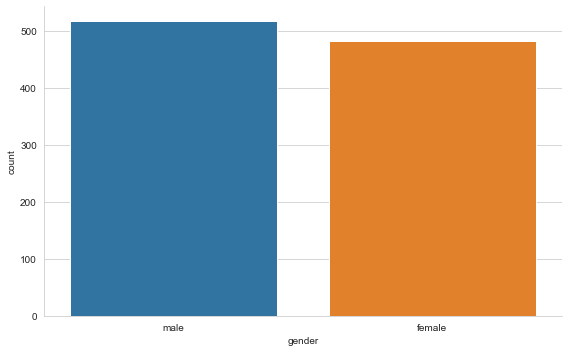

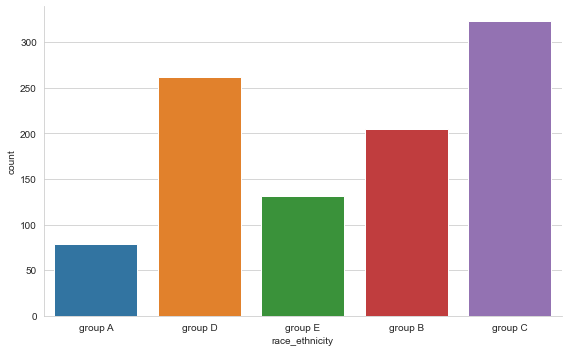

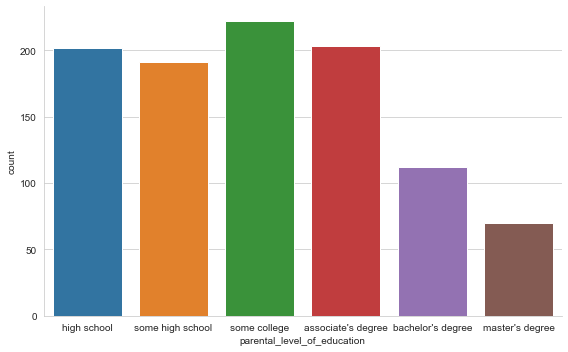

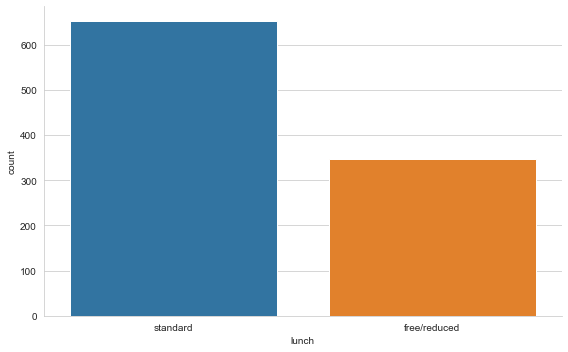

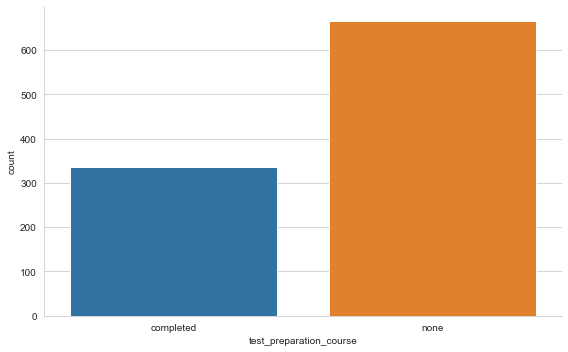

In [13]:
for col in categorical_columns:
    sns.catplot(data = df, x = col, kind = 'count', height=5, aspect=1.6);

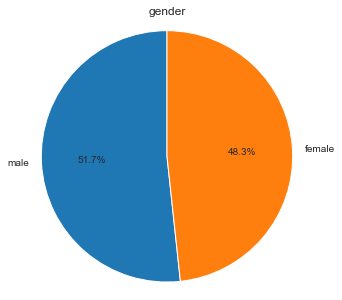

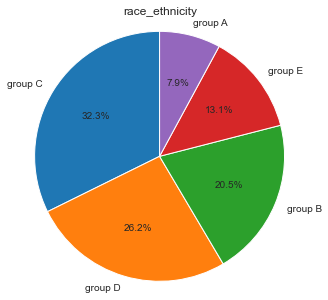

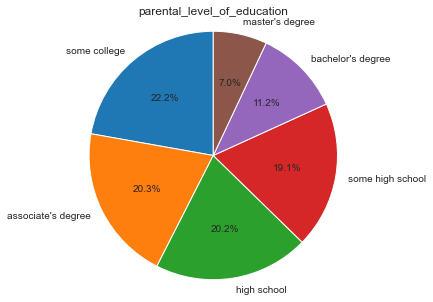

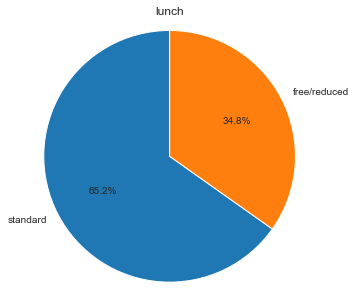

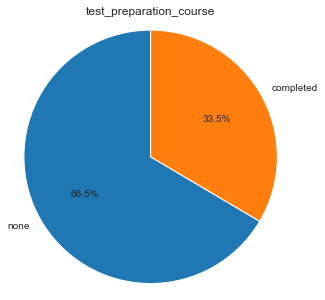

In [14]:
for cat_col in categorical_columns:
    labels = df[cat_col].value_counts().index
    sizes = df[cat_col].value_counts()

    fig1, ax1 = plt.subplots(figsize=(5,5))
    fig1
    title = plt.title(cat_col);
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

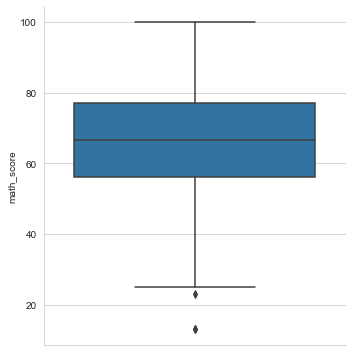

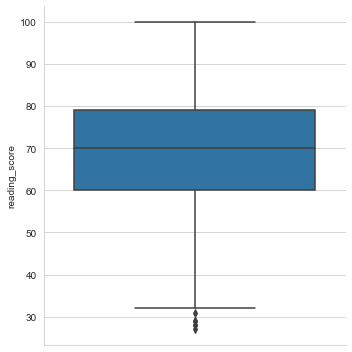

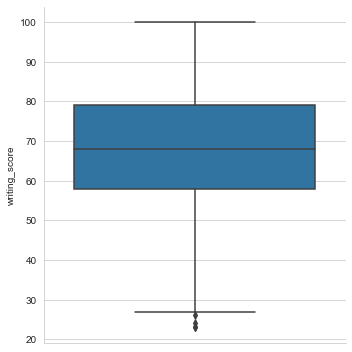

In [15]:
for num_col in numerical_columns:
    sns.catplot(data=df, y=num_col, kind='box');

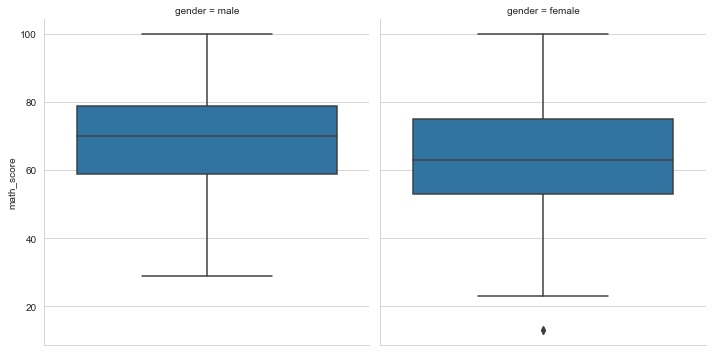

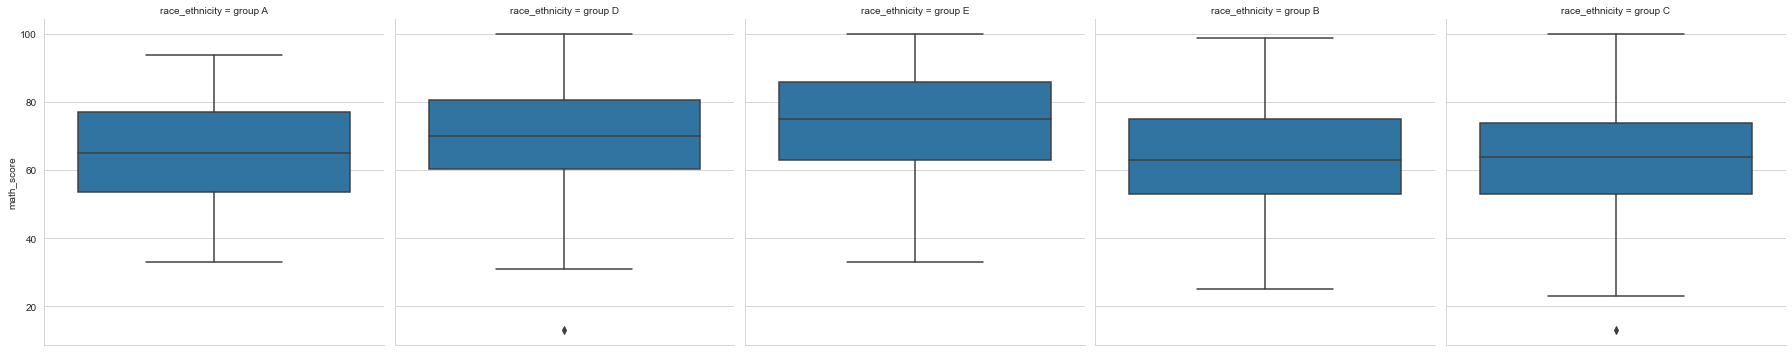

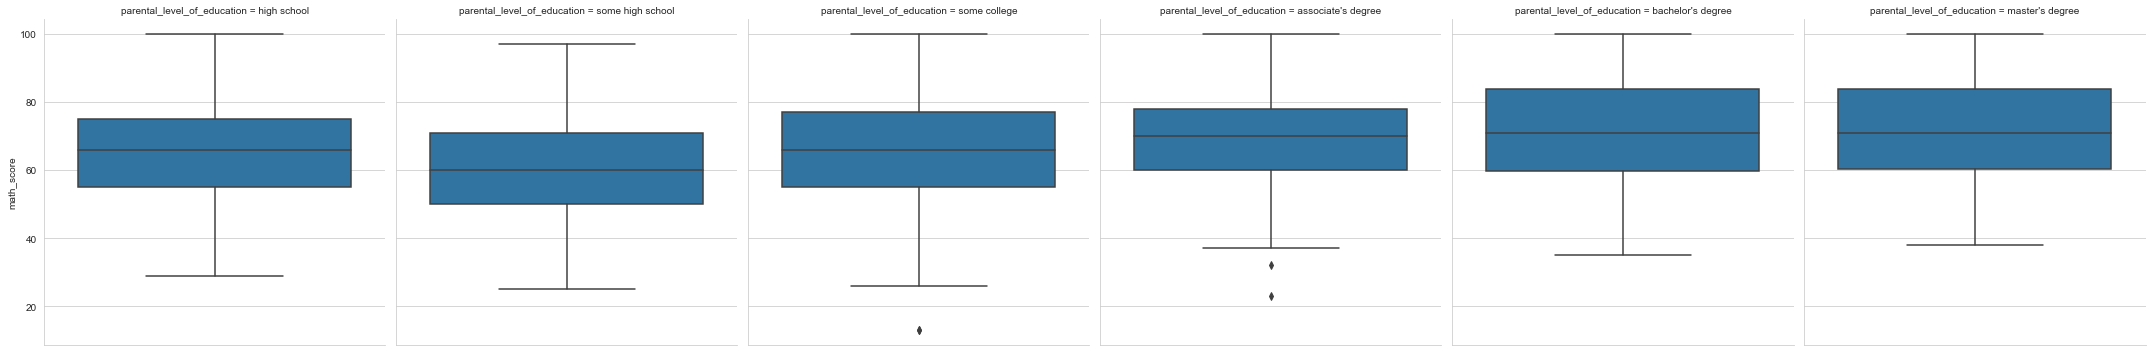

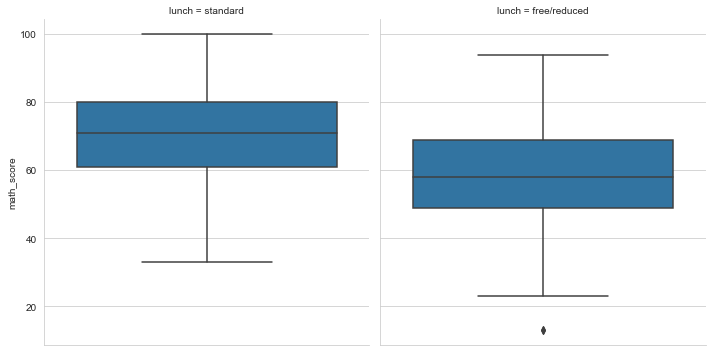

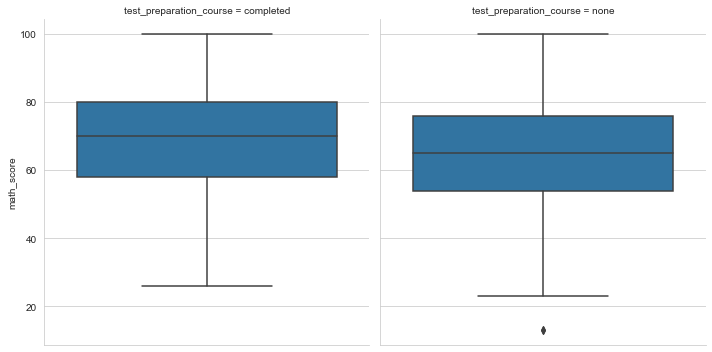

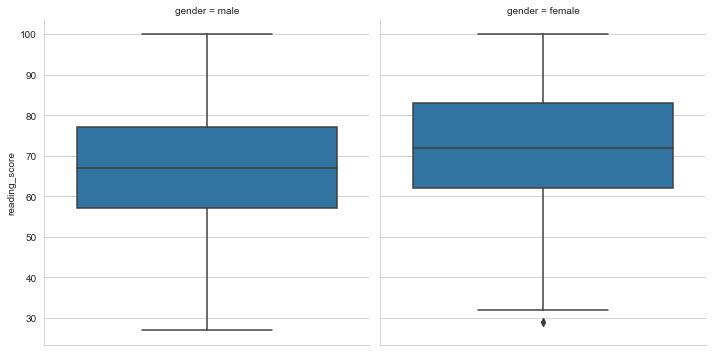

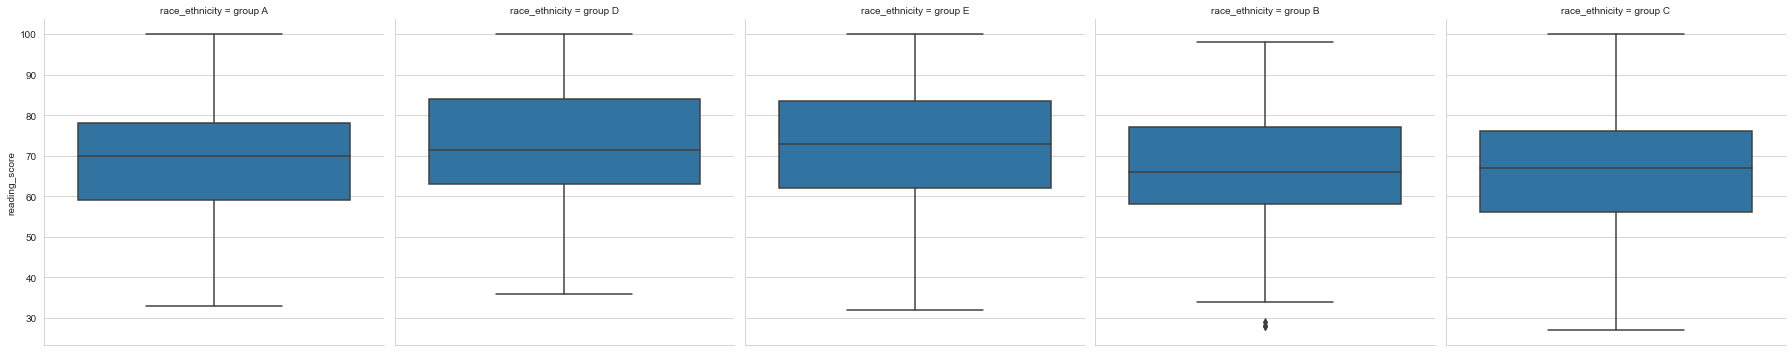

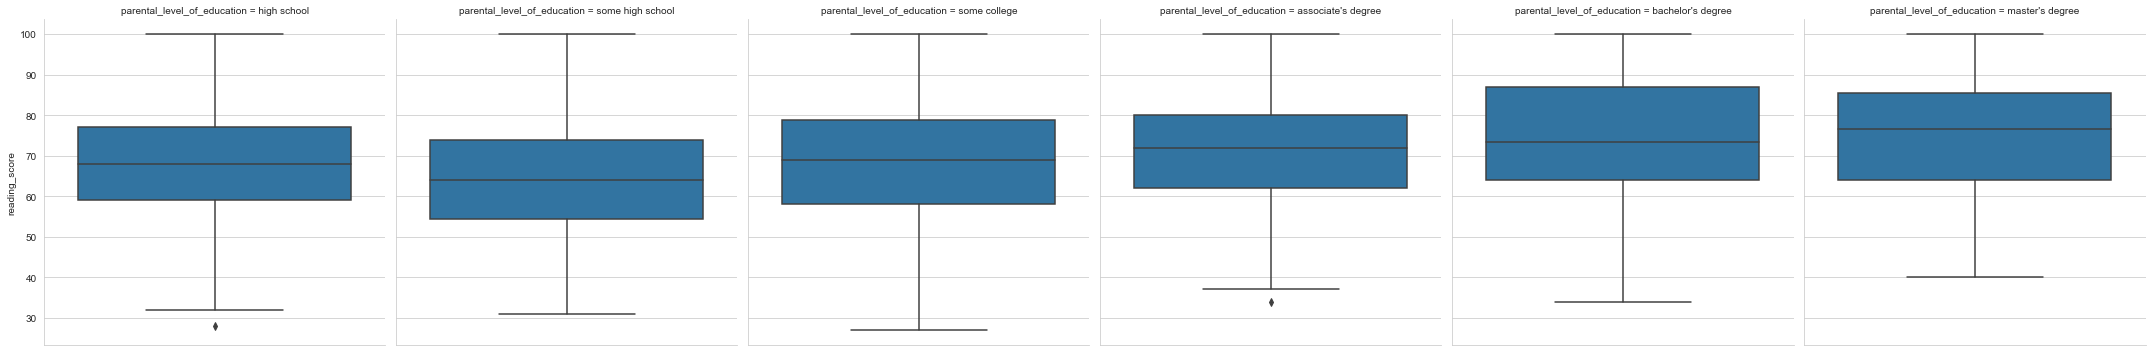

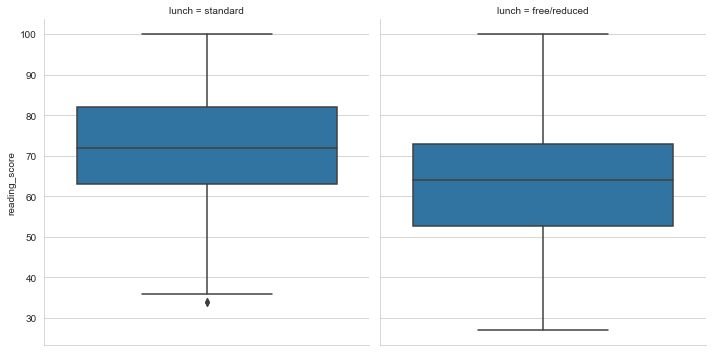

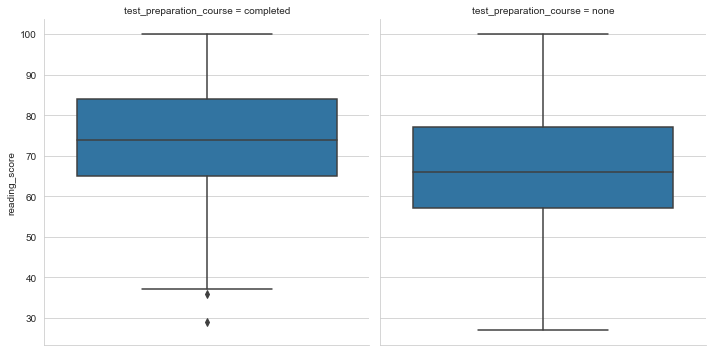

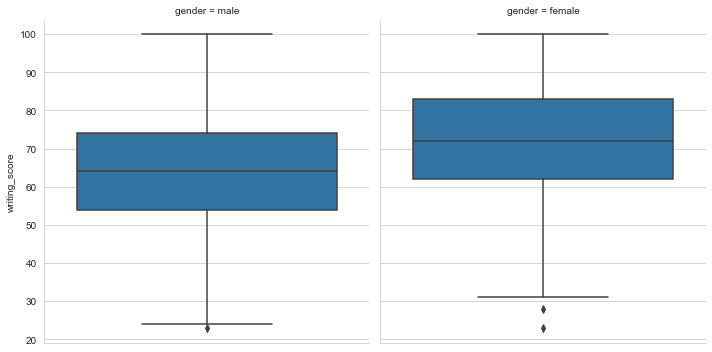

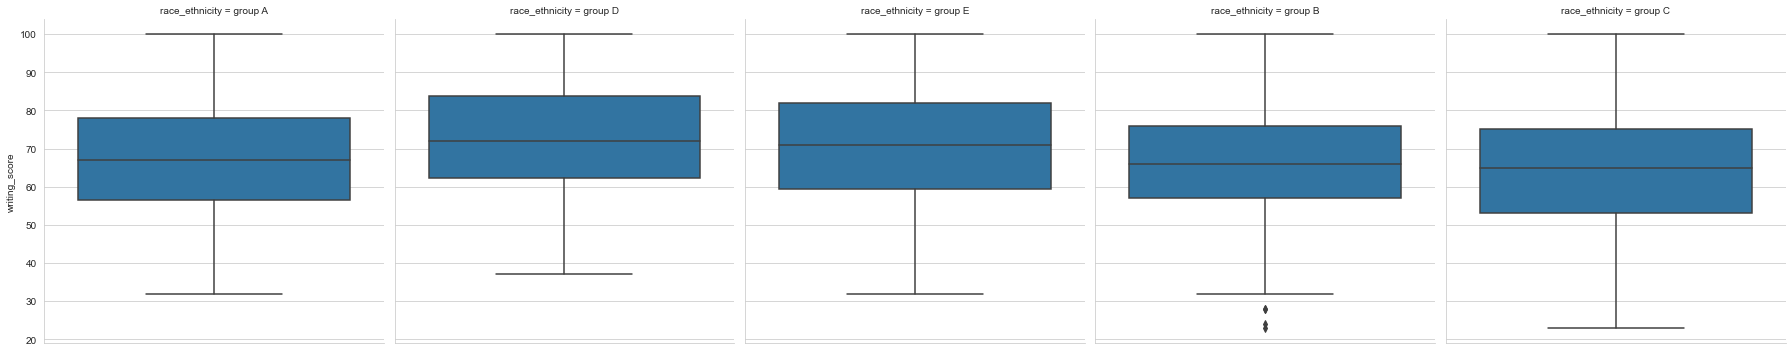

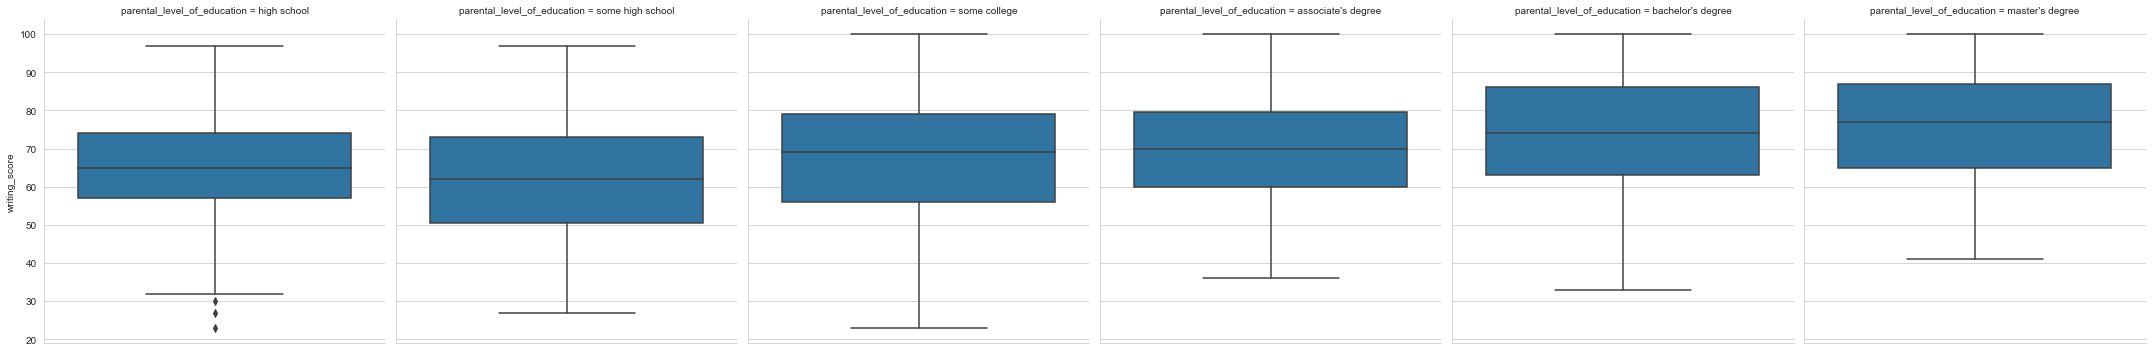

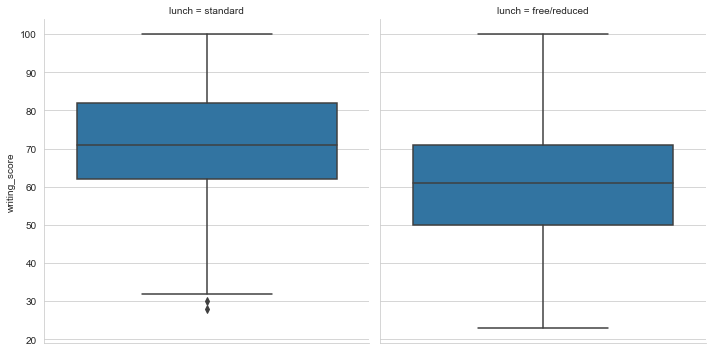

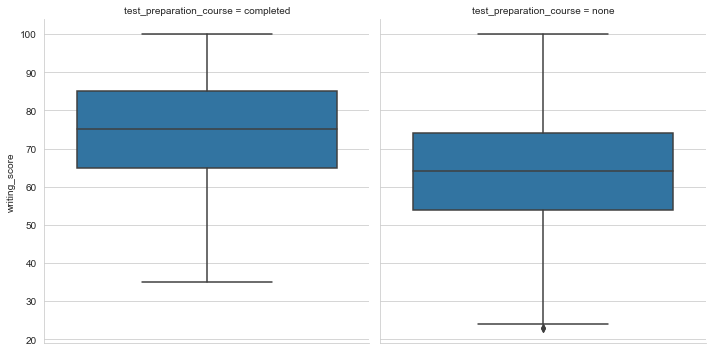

In [16]:
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        sns.catplot(data=df, y=num_col, col = cat_col, kind='box',height=5);

**Wniosek:** Wszystkie zmienne mają wpływ na wynik testów.

In [17]:
def histogram(df: pd.DataFrame, col_list: list, n_bin: int = 6):
    for col in col_list:
        plt.figure(figsize = (6,5))
        plt.hist(df[col], bins = n_bin)
        plt.title(col)

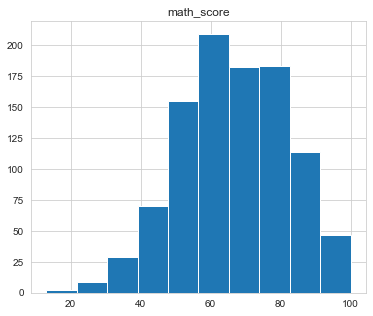

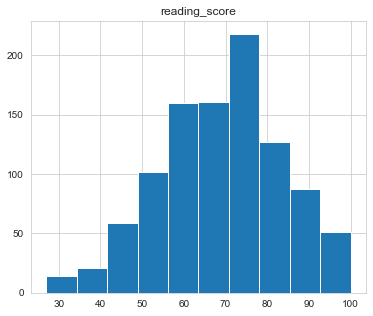

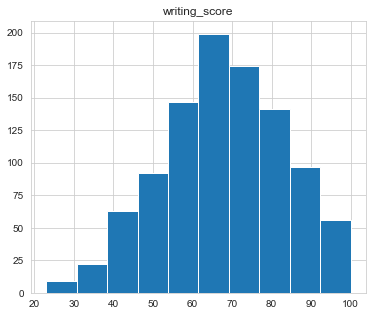

In [18]:
histogram(df, numerical_columns, n_bin= 10)

##### Checkpoint

In [19]:
df2 = df.copy()

##### One Hot Encoding

In [20]:
df2 = pd.get_dummies(df, columns=categorical_columns)
df2.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,67,67,63,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,40,59,55,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,59,60,50,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,77,78,68,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,78,73,68,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


##### Zmiana nazw kolumn

In [21]:

df2.columns = df2.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace('/','_')
df2.columns = df2.columns.str.replace('\'','')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math_score                                     1000 non-null   int64
 1   reading_score                                  1000 non-null   int64
 2   writing_score                                  1000 non-null   int64
 3   gender_female                                  1000 non-null   uint8
 4   gender_male                                    1000 non-null   uint8
 5   race_ethnicity_group_A                         1000 non-null   uint8
 6   race_ethnicity_group_B                         1000 non-null   uint8
 7   race_ethnicity_group_C                         1000 non-null   uint8
 8   race_ethnicity_group_D                         1000 non-null   uint8
 9   race_ethnicity_group_E                         1000 non-null   uint8
 10  p

In [22]:

df2.corr(method='spearman')

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group_A,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_associates_degree,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school,lunch_free_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
math_score,1.000000,0.814258,0.798316,-0.193047,0.193047,-0.023776,-0.110060,-0.141661,0.118324,0.192825,0.100685,0.108103,-0.039365,0.090441,-0.030072,-0.176459,-0.363140,0.363140,0.145819,-0.145819
reading_score,0.814258,1.000000,0.950767,0.181827,-0.181827,-0.002531,-0.062969,-0.123938,0.121751,0.090464,0.063285,0.118116,-0.053636,0.109558,-0.024637,-0.149800,-0.273246,0.273246,0.244122,-0.244122
writing_score,0.798316,0.950767,1.000000,0.240425,-0.240425,-0.012614,-0.060662,-0.139161,0.165223,0.060208,0.071983,0.146431,-0.091265,0.132708,-0.020359,-0.162533,-0.308331,0.308331,0.312719,-0.312719
gender_female,-0.193047,0.181827,0.240425,1.000000,-1.000000,-0.008584,0.074281,-0.008597,-0.002485,-0.066861,-0.084821,0.024773,-0.017774,0.064235,-0.034795,0.080166,-0.033962,0.033962,-0.007653,0.007653
gender_male,0.193047,-0.181827,-0.240425,-1.000000,1.000000,0.008584,-0.074281,0.008597,0.002485,0.066861,0.084821,-0.024773,0.017774,-0.064235,0.034795,-0.080166,0.033962,-0.033962,0.007653,-0.007653
race_ethnicity_group_A,-0.023776,-0.002531,-0.012614,-0.008584,0.008584,1.000000,-0.148723,-0.202298,-0.174504,-0.113713,-0.046425,0.060564,-0.008846,0.035889,0.021962,-0.038564,-0.011612,0.011612,0.043475,-0.043475
race_ethnicity_group_B,-0.110060,-0.062969,-0.060662,0.074281,-0.074281,-0.148723,1.000000,-0.350752,-0.302563,-0.197160,-0.009946,-0.023250,-0.014869,0.045144,0.020802,-0.007278,-0.006968,0.006968,0.017450,-0.017450
race_ethnicity_group_C,-0.141661,-0.123938,-0.139161,-0.008597,0.008597,-0.202298,-0.350752,1.000000,-0.411556,-0.268184,0.050140,-0.007974,-0.038595,-0.021875,-0.013924,0.023431,0.011655,-0.011655,-0.028113,0.028113
race_ethnicity_group_D,0.118324,0.121751,0.165223,-0.002485,0.002485,-0.174504,-0.302563,-0.411556,1.000000,-0.231339,-0.018013,-0.002481,0.034416,-0.020857,-0.006370,0.005542,-0.062906,0.062906,-0.018165,0.018165
race_ethnicity_group_E,0.192825,0.090464,0.060208,-0.066861,0.066861,-0.113713,-0.197160,-0.268184,-0.231339,1.000000,0.002999,-0.006316,0.033500,-0.025207,-0.014848,-0.000158,0.083452,-0.083452,0.007002,-0.007002


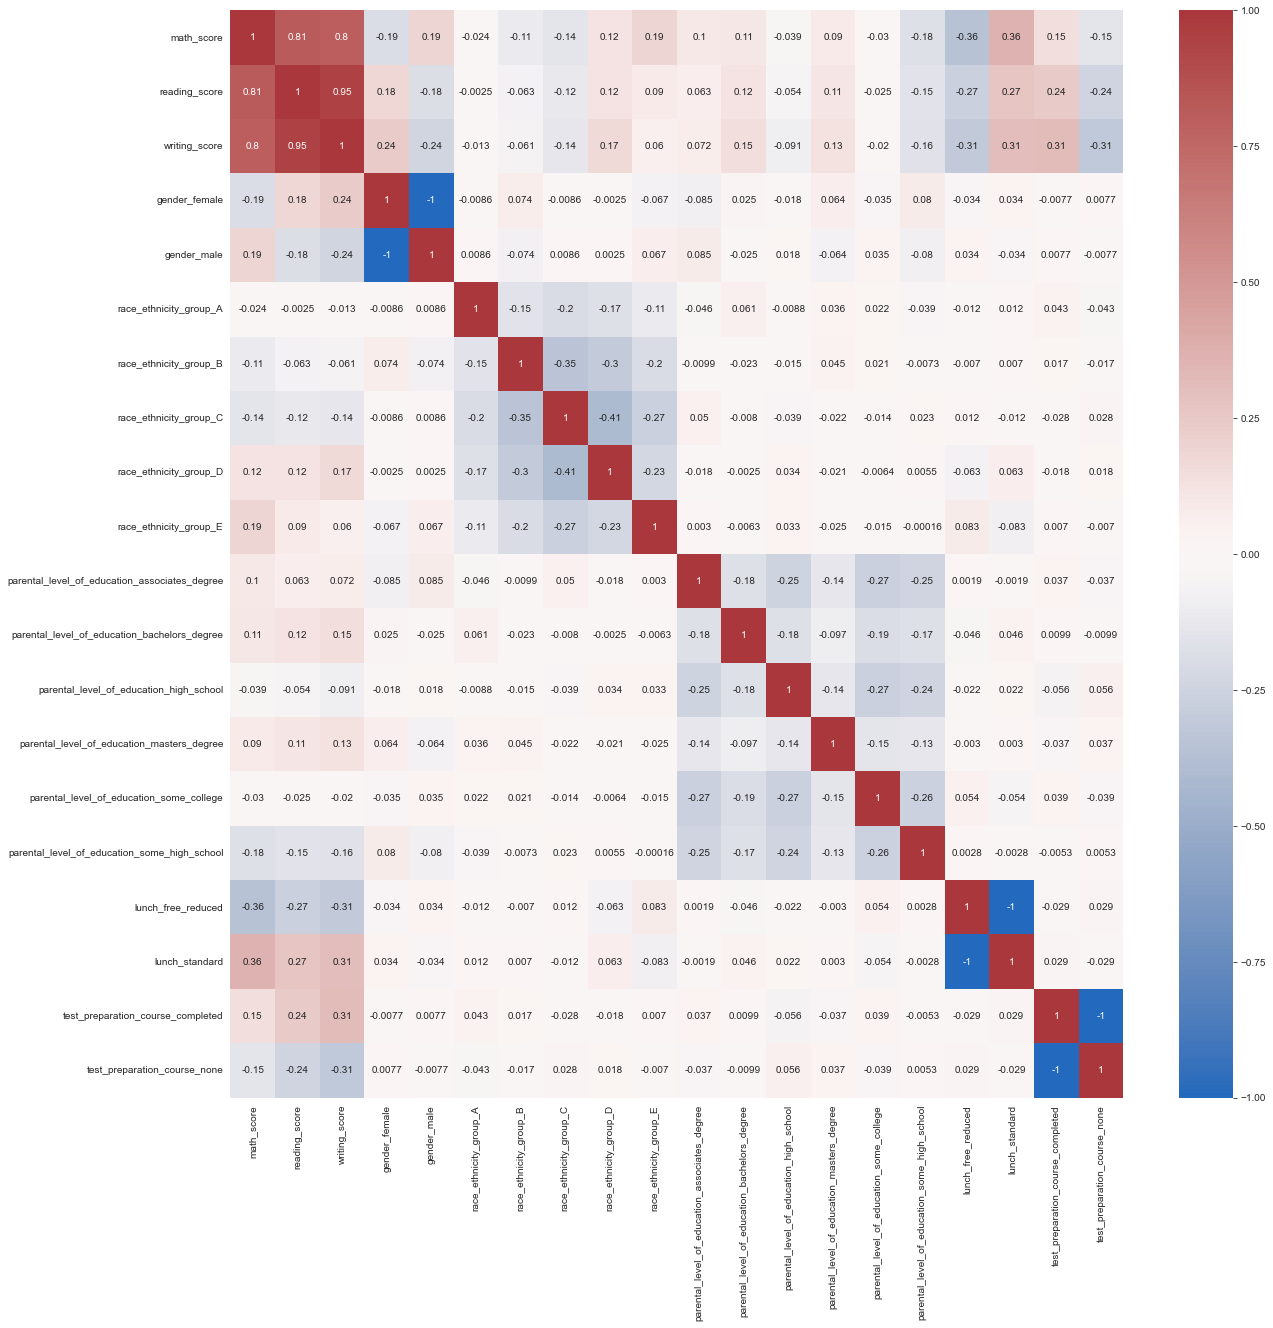

In [23]:
plt.figure(figsize = (20,20)) #rozmiar wykresu
sns.color_palette("viridis", as_cmap=True) #paleta kolorów, parametr as_cmap skaluje liczby na kolor (RGB)
Var_Corr = df2.corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="vlag", center=0);

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math_score                                     1000 non-null   int64
 1   reading_score                                  1000 non-null   int64
 2   writing_score                                  1000 non-null   int64
 3   gender_female                                  1000 non-null   uint8
 4   gender_male                                    1000 non-null   uint8
 5   race_ethnicity_group_A                         1000 non-null   uint8
 6   race_ethnicity_group_B                         1000 non-null   uint8
 7   race_ethnicity_group_C                         1000 non-null   uint8
 8   race_ethnicity_group_D                         1000 non-null   uint8
 9   race_ethnicity_group_E                         1000 non-null   uint8
 10  p

##### Zmienne objaśniające niezależne

In [25]:
categorical_columns_wo_correlated = df2.select_dtypes(include=['uint8']).columns.tolist()
categorical_columns_wo_correlated

['gender_female',
 'gender_male',
 'race_ethnicity_group_A',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 'parental_level_of_education_some_college',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 'lunch_standard',
 'test_preparation_course_completed',
 'test_preparation_course_none']

In [26]:
categorical_columns_wo_correlated = [
'gender_female',
 #'gender_male',
 #'race_ethnicity_group_A',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 #'parental_level_of_education_some_college',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 #'lunch_standard',
 'test_preparation_course_completed'
 #'test_preparation_course_none'
 ]
categorical_columns_wo_correlated

['gender_female',
 'race_ethnicity_group_B',
 'race_ethnicity_group_C',
 'race_ethnicity_group_D',
 'race_ethnicity_group_E',
 'parental_level_of_education_associates_degree',
 'parental_level_of_education_bachelors_degree',
 'parental_level_of_education_high_school',
 'parental_level_of_education_masters_degree',
 'parental_level_of_education_some_high_school',
 'lunch_free_reduced',
 'test_preparation_course_completed']

---

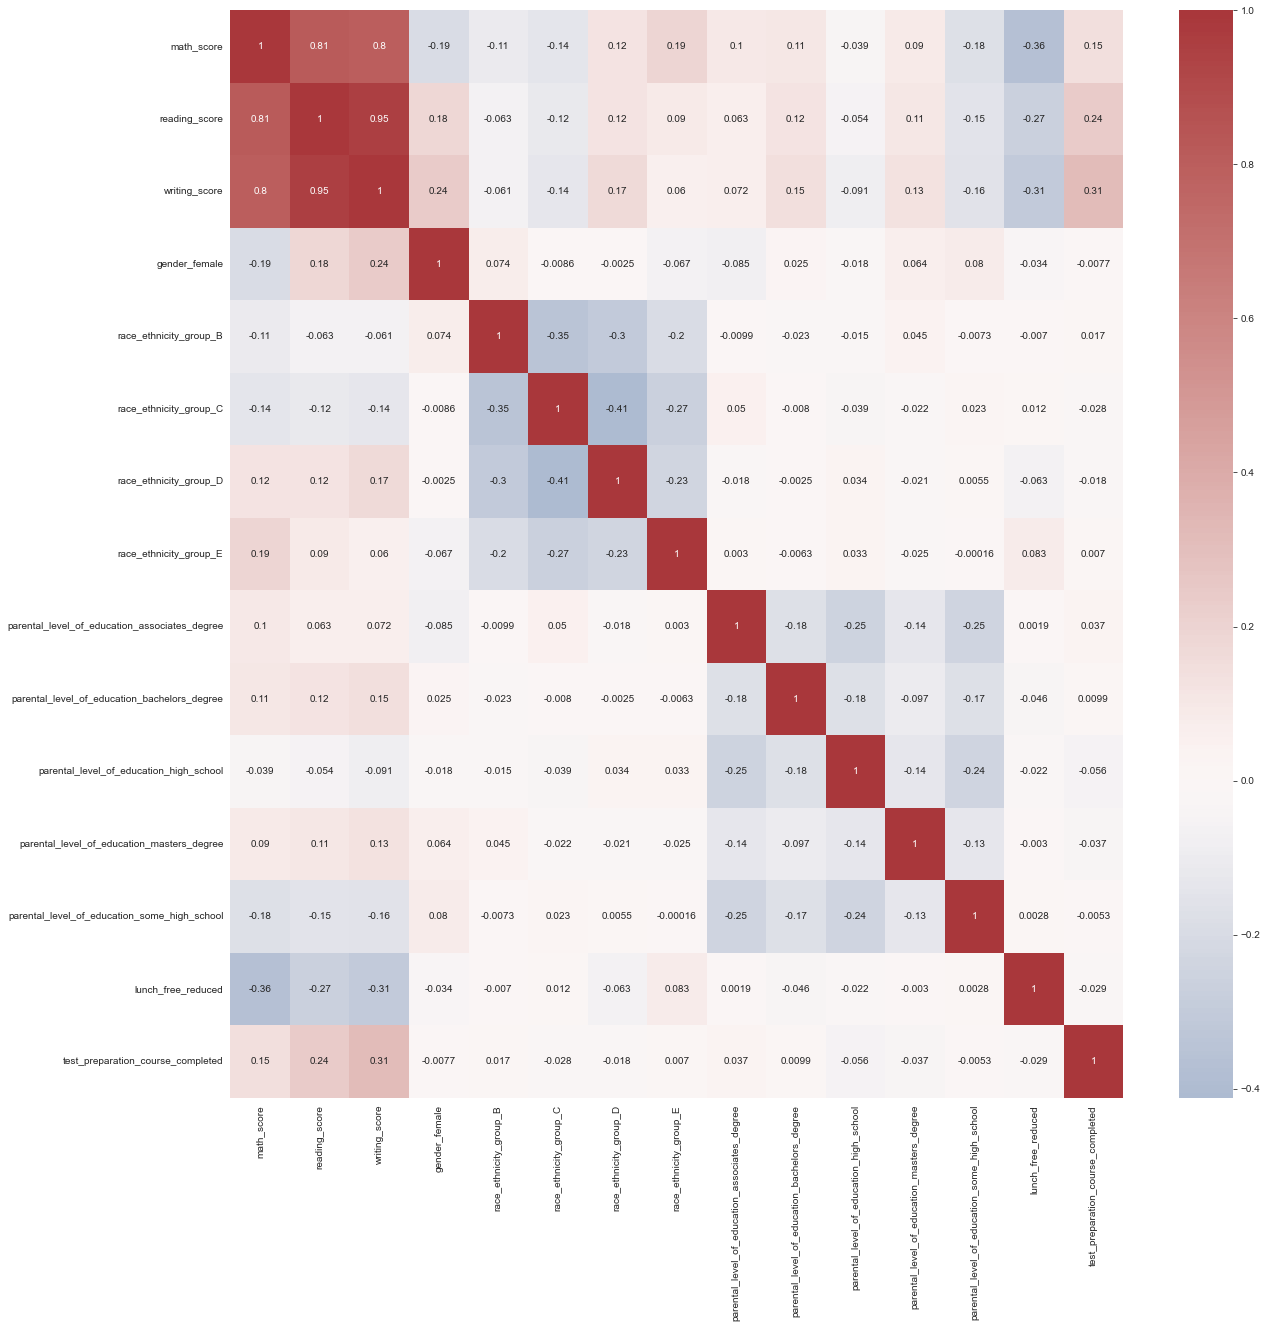

In [27]:
plt.figure(figsize = (20,20)) #rozmiar wykresu
sns.color_palette("viridis", as_cmap=True) #paleta kolorów, parametr as_cmap skaluje liczby na kolor (RGB)
Var_Corr = df2[numerical_columns + categorical_columns_wo_correlated].corr(method='spearman')
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap="vlag", center=0);

### Podział danych

In [28]:
X  = df2.drop(['math_score', 'reading_score', 'writing_score'], axis = 1)
y_math = df2['math_score']
y_reading = df2['reading_score']
y_writing = df2['writing_score']

In [29]:
X.head(5)

,gender_female,gender_male,race_ethnicity_group_A,race_ethnicity_group_B,race_ethnicity_group_C,race_ethnicity_group_D,race_ethnicity_group_E,parental_level_of_education_associates_degree,parental_level_of_education_bachelors_degree,parental_level_of_education_high_school,parental_level_of_education_masters_degree,parental_level_of_education_some_college,parental_level_of_education_some_high_school,lunch_free_reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


In [30]:
y_math.head(5), y_reading.head(5), y_writing.head(5)

(0    67
 1    40
 2    59
 3    77
 4    78
 Name: math_score, dtype: int64,
 0    67
 1    59
 2    60
 3    78
 4    73
 Name: reading_score, dtype: int64,
 0    63
 1    55
 2    50
 3    68
 4    68
 Name: writing_score, dtype: int64)

In [31]:
X_train, X_test, y_math_train, y_math_test, y_reading_train, y_reading_test, y_writing_train, y_writing_test = train_test_split(
    X, y_math, y_reading, y_writing, test_size = 0.2, random_state = 1)

X_train, X_val, y_math_train, y_math_val, y_reading_train, y_reading_val, y_writing_train, y_writing_val = train_test_split(
    X_train, y_math_train, y_reading_train, y_writing_train, test_size = 0.2, random_state = 1)

In [32]:
X_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [33]:
y_math_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [34]:
y_reading_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [35]:
y_writing_train.head(5).index

Int64Index([908, 989, 382, 122, 136], dtype='int64')

In [36]:
X_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [37]:
y_math_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [38]:
y_reading_val.head(5).index


Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [39]:
y_writing_val.head(5).index

Int64Index([340, 500, 118, 792, 635], dtype='int64')

In [40]:
X_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [41]:
y_math_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [42]:
y_reading_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [43]:
y_writing_test.head(5).index

Int64Index([507, 818, 452, 368, 242], dtype='int64')

In [44]:
(X_train.shape, X_val.shape, X_test.shape, y_math_train.shape,  y_math_val.shape, y_math_test.shape,
 y_reading_train.shape, y_reading_val.shape, y_reading_test.shape, y_writing_train.shape, y_writing_val.shape, y_writing_test.shape)

((640, 17),
 (160, 17),
 (200, 17),
 (640,),
 (160,),
 (200,),
 (640,),
 (160,),
 (200,),
 (640,),
 (160,),
 (200,))

### Modele

In [45]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=4)
forest_model = RandomForestRegressor(max_depth=4)
xgboost_model = xgb.XGBRegressor(max_depth=4)
svm_model = SVR()
knn_model = KNeighborsRegressor()


In [46]:
model_list = [linear_model, tree_model, forest_model, xgboost_model, svm_model, knn_model]

In [47]:
def run_regression_model(model, X_train, y_train, X_test, y_test):
    model_name = type(model).__name__

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    #rmse trzeba samemu stworzyć
    #rmse = np.sqrt(-cross_val_score(model, X, y, cv=cross_val, scoring='neg_root_mean_squared_error'))
    mse_test = mean_squared_error(y_test,y_pred)
    r2_test = r2_score(y_test,y_pred)
    mse_train = mean_squared_error(y_train,y_train_pred)
    r2_train = r2_score(y_train,y_train_pred)
    return {'model_name': model_name,
            'predictions': y_pred,
            'mse_train': mse_train,
            'r2_train': r2_train,
            'mse_test': mse_test,
            'r2_test': r2_test
            }

##### math_score

In [48]:
#Wyniki dla walidacyjnego
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_math_train, X_val, y_math_val)
    results_list.append(results)

In [49]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 162.681 MSE test: 137.840 	R2 train: 0.336 R2 test: 0.247
DecisionTreeRegressor 	MSE train: 161.159 MSE test: 177.922 	R2 train: 0.342 R2 test: 0.028
RandomForestRegressor 	MSE train: 151.786 MSE test: 154.795 	R2 train: 0.380 R2 test: 0.154
XGBRegressor 	MSE train: 121.168 MSE test: 188.262 	R2 train: 0.505 R2 test: -0.028
SVR 	MSE train: 168.033 MSE test: 140.243 	R2 train: 0.314 R2 test: 0.234
KNeighborsRegressor 	MSE train: 138.518 MSE test: 176.826 	R2 train: 0.434 R2 test: 0.034


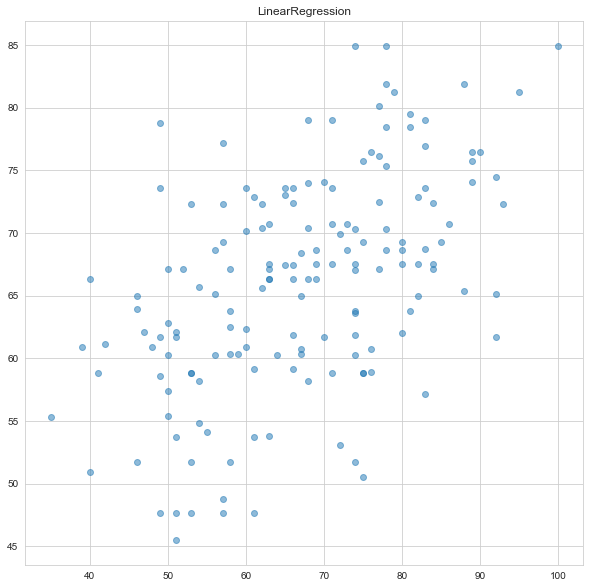

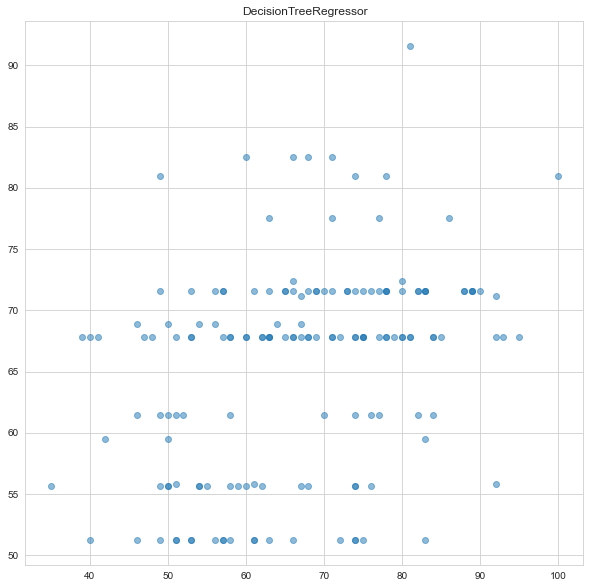

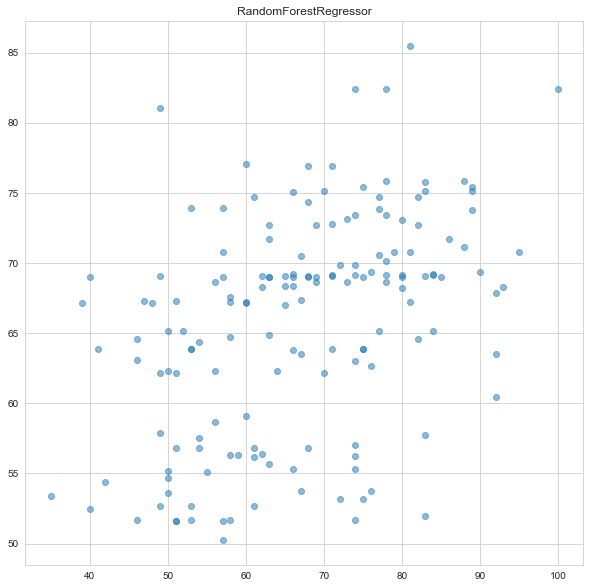

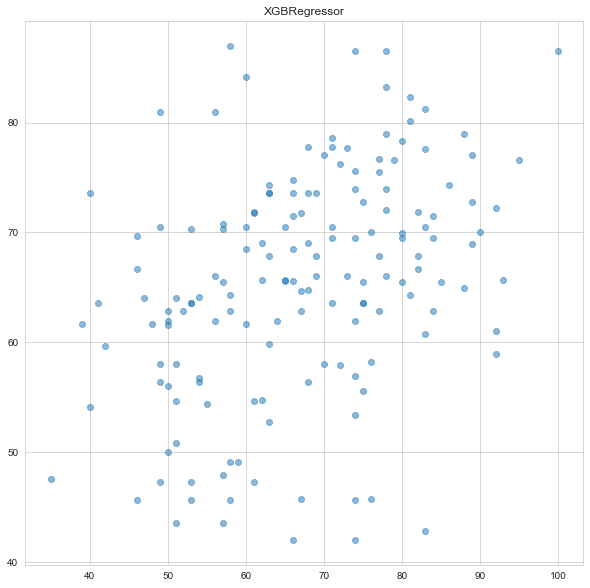

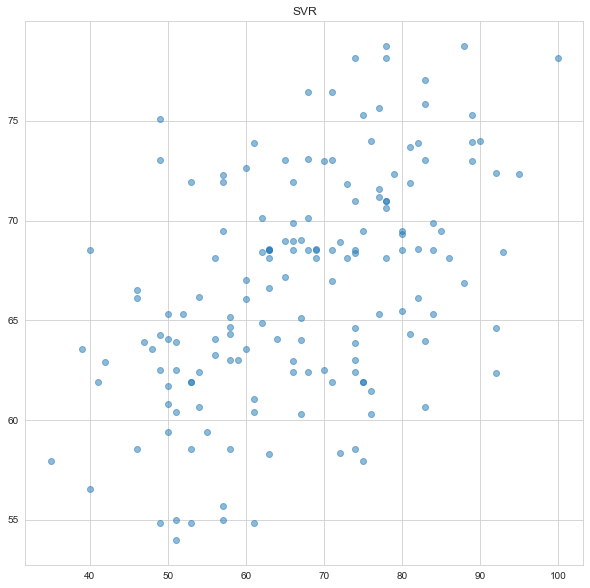

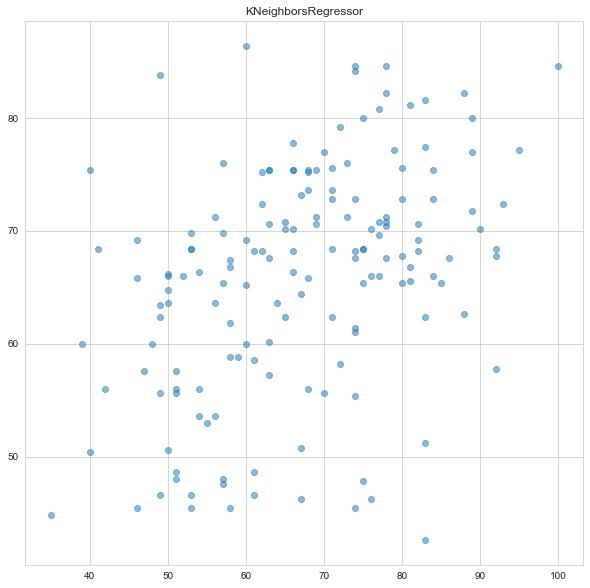

In [50]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_math_val, model['predictions'], alpha=0.5)

**Wniosek:** najlepsze modele liniowa regresja i SVM

##### writing score

In [51]:
#Wyniki dla walidacyjnego
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_writing_train, X_val, y_writing_val)
    results_list.append(results)

In [52]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 156.043 MSE test: 131.003 	R2 train: 0.354 R2 test: 0.393
DecisionTreeRegressor 	MSE train: 162.905 MSE test: 158.179 	R2 train: 0.326 R2 test: 0.268
RandomForestRegressor 	MSE train: 154.277 MSE test: 151.479 	R2 train: 0.362 R2 test: 0.299
XGBRegressor 	MSE train: 117.710 MSE test: 170.297 	R2 train: 0.513 R2 test: 0.211
SVR 	MSE train: 164.528 MSE test: 144.183 	R2 train: 0.319 R2 test: 0.332
KNeighborsRegressor 	MSE train: 137.630 MSE test: 168.564 	R2 train: 0.431 R2 test: 0.219


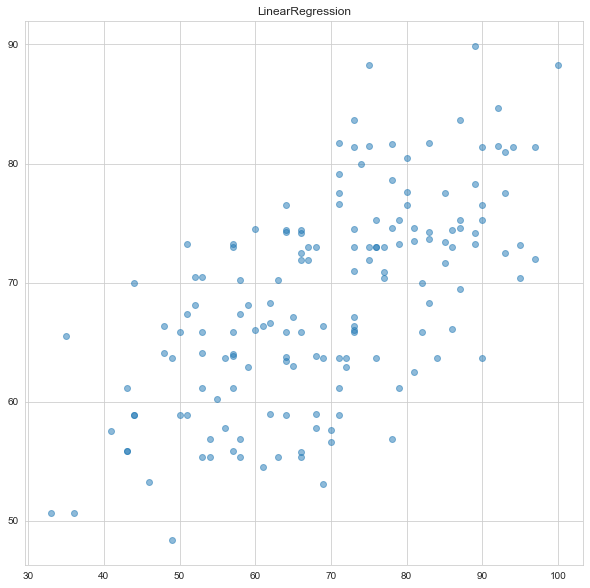

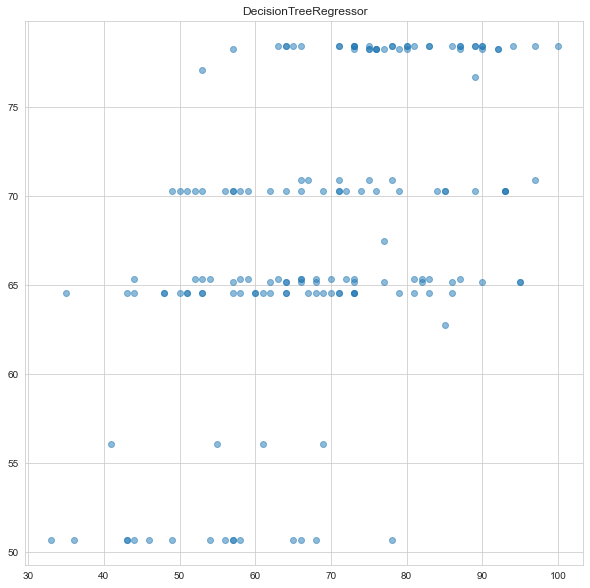

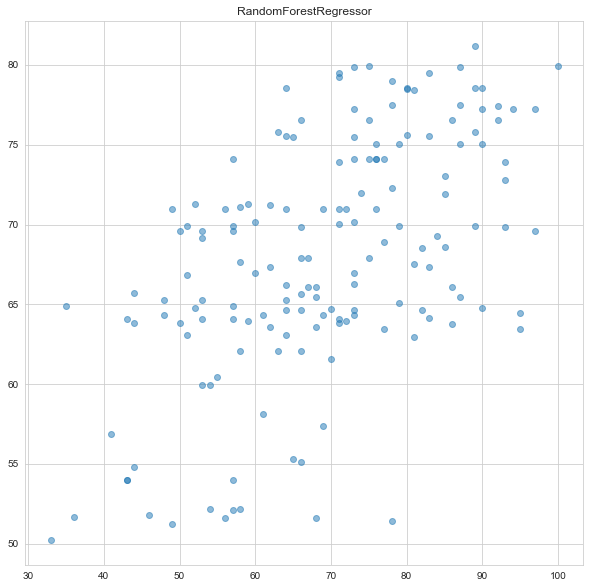

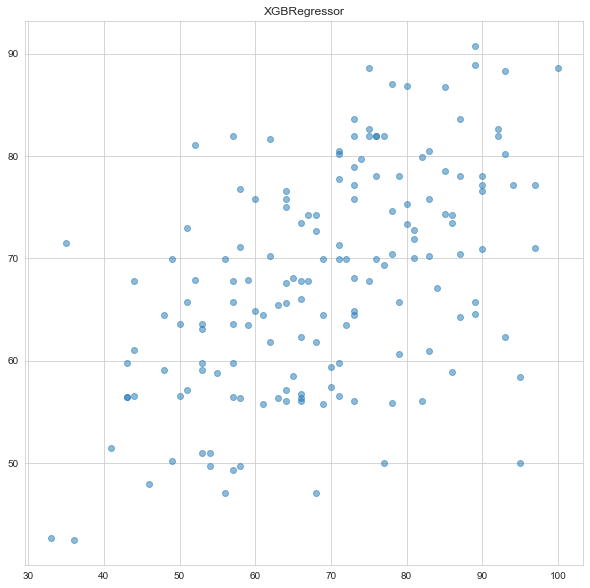

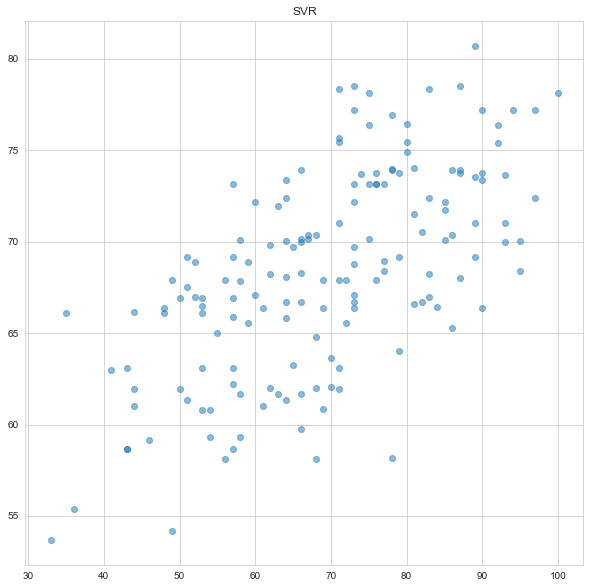

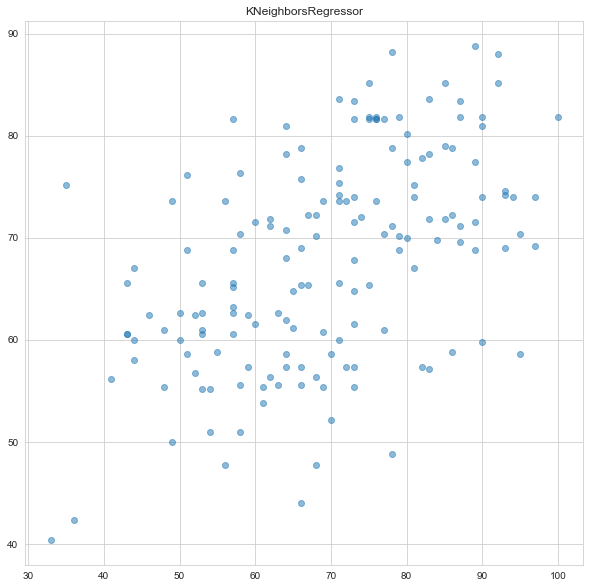

In [53]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_writing_val, model['predictions'], alpha=0.5)

**Wniosek:** Liniowa regresja i SVM znów najlepsze

##### reading score

In [54]:
#Wyniki dla walidacyjnego
results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_reading_train, X_val, y_reading_val)
    results_list.append(results)

In [55]:
for model_results in results_list:
    print(model_results['model_name'], '\t'
     'MSE train:', '{:.3f}'.format(model_results['mse_train']), 'MSE test:', '{:.3f}'.format(model_results['mse_test']), '\t'
     'R2 train:', '{:.3f}'.format(model_results['r2_train']), 'R2 test:', '{:.3f}'.format(model_results['r2_test']))

LinearRegression 	MSE train: 165.794 MSE test: 132.349 	R2 train: 0.247 R2 test: 0.252
DecisionTreeRegressor 	MSE train: 167.768 MSE test: 145.091 	R2 train: 0.238 R2 test: 0.180
RandomForestRegressor 	MSE train: 159.336 MSE test: 143.448 	R2 train: 0.277 R2 test: 0.189
XGBRegressor 	MSE train: 127.122 MSE test: 177.474 	R2 train: 0.423 R2 test: -0.003
SVR 	MSE train: 170.551 MSE test: 137.865 	R2 train: 0.226 R2 test: 0.221
KNeighborsRegressor 	MSE train: 145.242 MSE test: 172.801 	R2 train: 0.341 R2 test: 0.023


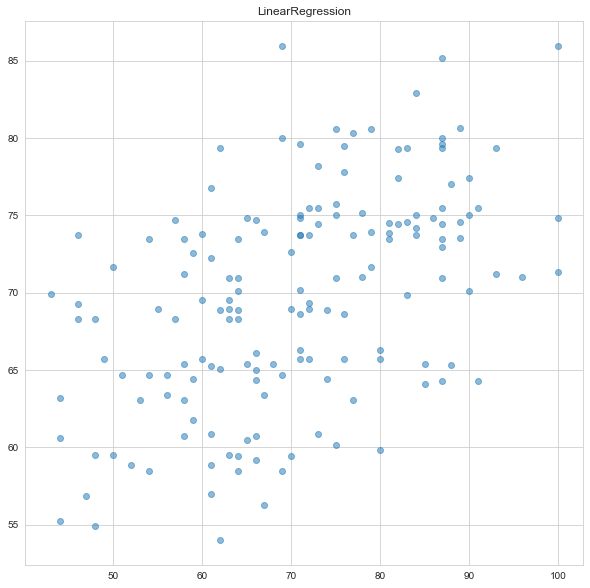

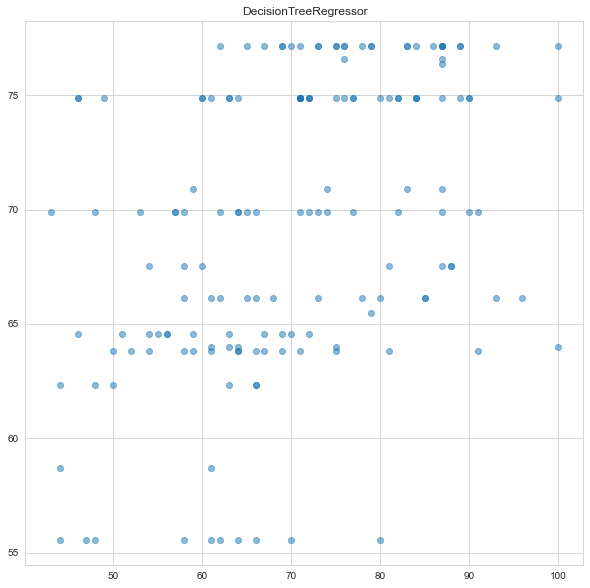

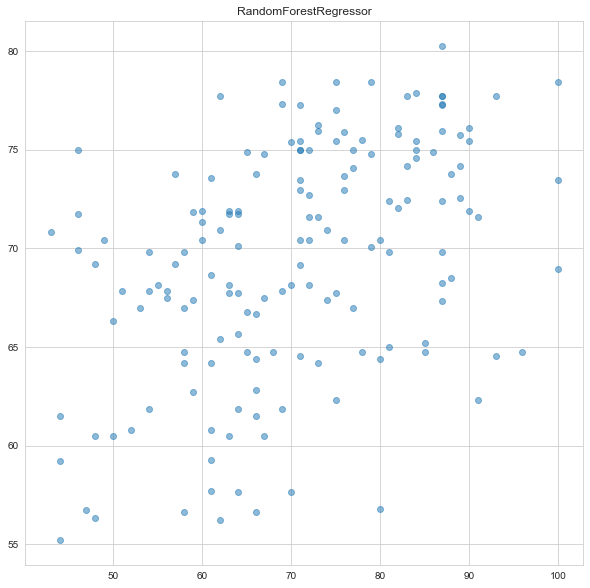

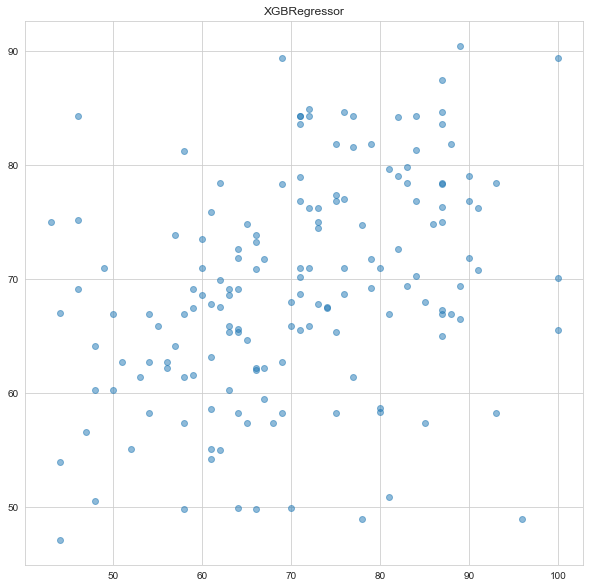

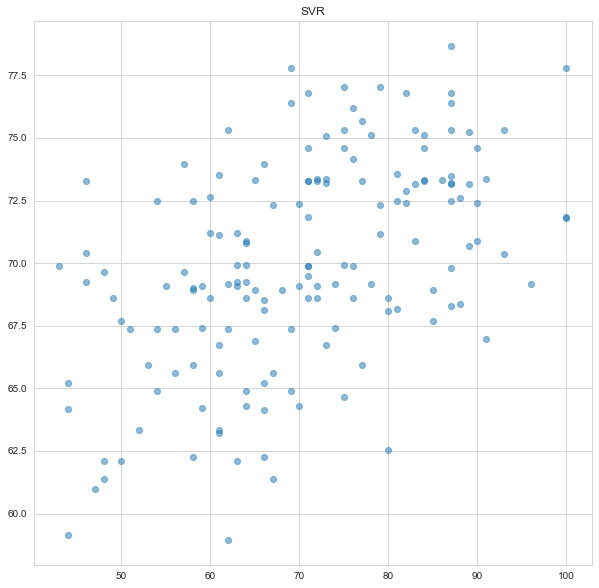

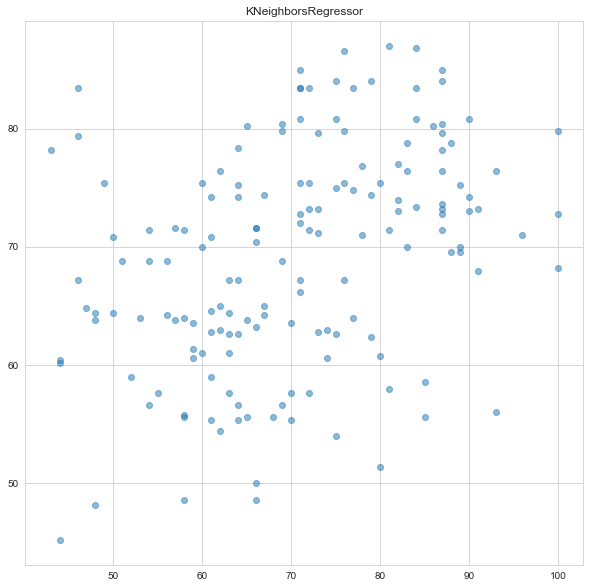

In [56]:
for model in results_list:
    plt.figure(figsize = (10,10))
    plt.title(model['model_name'])
    plt.scatter(y_reading_val, model['predictions'], alpha=0.5)

**Wniosek:** Znów liniowa regresja i SVM najlepsze

### Wybrane modele:
- Regesja liniowa
- SVM

### Dostrajanie hiperparametrów

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
def grid_search_results (model, X_train, y_train, X_test, param_grid, scorer, refit, return_train_score:bool = True):
    # grid search
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring = scorer, refit = refit, return_train_score=return_train_score, verbose=0)
    grid_search.fit(X_train, y_train)
    best_est = grid_search.best_estimator_
    res = grid_search.cv_results_
    best_est, res
    # # Zebranie score'ów dla najlepszego klasyfikatora
    slownik_score = {}

    #Najlepszy klasyfikator na zbiorze testowym wg metryki, którą badamy
    scorer_rank = 'rank_test_' + refit
    rank_min = grid_search.cv_results_[scorer_rank].argmin()

    #zbieramy wszystkie scorery dla zbiorów scorer_prefixes
    for sc in scorer:
        for sc_prefix in scorer_prefixes:
        
            scorer_name = sc_prefix + sc
            if 'neg' in sc:
                scorer_value = - grid_search.cv_results_[scorer_name][rank_min]
            else:
                scorer_value = grid_search.cv_results_[scorer_name][rank_min]
            
            slownik_score[sc_prefix  + sc] = scorer_value
    
    #Zapisanie kombinacji najlepszych parametrów do słownika
    slownik_score['best_params'] = grid_search.best_params_

    #predykcja dla najlepszego estymatora wg recall
    y_train_pred = best_est.predict(X_train)
    #y_pred_proba = best_est.predict_proba(X_train)[:,1]

    #Zapisanie predykcji do słownika
    slownik_score['y_train_pred'] = y_train_pred
    
    y_pred = best_est.predict(X_test)
    #y_pred_proba_test = best_est.predict_proba(X_test)[:,1]
    
    #Zapisanie predykcji do słownika
    slownik_score['y_pred'] = y_pred
    
    return slownik_score



In [59]:
param_svm = {"C": [0.1, 0.5, 1, 1.5],
                'kernel': ['rbf','poly'],
                'gamma': ['auto','scale'],
                'degree': [2, 3, 4]
            }


In [60]:
rank = ['rank_train_', 'rank_test_']
scorer_prefixes = ['mean_train_','mean_test_']

scorer = ['neg_mean_squared_error', 'r2']
refit = 'neg_mean_squared_error'

y_train = y_math_train



In [61]:
svm_results = grid_search_results(svm_model, X_train, y_train, X_val,
 param_grid=param_svm, scorer = scorer, refit = refit, return_train_score=True)


In [62]:
svm_results.keys()

dict_keys(['mean_train_neg_mean_squared_error', 'mean_test_neg_mean_squared_error', 'mean_train_r2', 'mean_test_r2', 'best_params', 'y_train_pred', 'y_pred'])

In [63]:
print(svm_results['mean_train_neg_mean_squared_error'], svm_results['mean_test_neg_mean_squared_error'], '\n',
svm_results['mean_train_r2'], svm_results['mean_test_r2'], '\n',
svm_results['best_params'])

155.00026976268393 168.65924247470375 
 0.3669115375794929 0.30685815287440066 
 {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


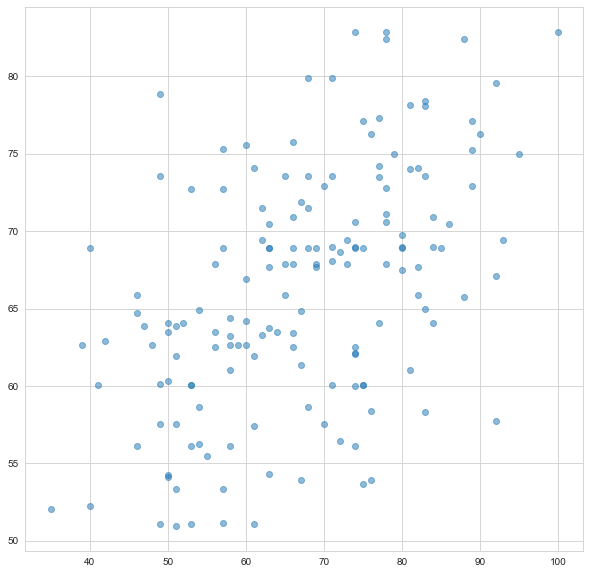

In [64]:
plt.figure(figsize = (10,10))
plt.scatter(y_math_val, svm_results['y_pred'], alpha=0.5)

Mamy punkt zaczepny dla doboru parametrów. Kontynuuje dostrajanie hiperparametrów ręcznie

In [62]:
X  = df2.drop(['math_score', 'reading_score', 'writing_score'], axis = 1)
y_math = df2['math_score']
y_reading = df2['reading_score']
y_writing = df2['writing_score']

In [63]:
X_train, X_test, y_math_train, y_math_test, y_reading_train, y_reading_test, y_writing_train, y_writing_test = train_test_split(
    X, y_math, y_reading, y_writing, test_size = 0.2, random_state = 1)

X_train, X_val, y_math_train, y_math_val, y_reading_train, y_reading_val, y_writing_train, y_writing_val = train_test_split(
    X_train, y_math_train, y_reading_train, y_writing_train, test_size = 0.2, random_state = 1)

In [56]:
# {'C': 1.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [137]:
SVM_results = []

In [150]:
kern = 'poly'
d = 2
g = 'scale'
c = 1

# UWAGA! Wyrzuca błąd przy podkładaniu zmiennej przy degree: an integer is required

svm_model = SVR(kernel= kern, degree= d, gamma = g, C = c)

model_list = [svm_model]

#Wyniki dla walidacyjnego
# results_list = []
for model in model_list:
    results = run_regression_model(model, X_train, y_math_train, X_val, y_math_val)
    results['hiperparameters'] = f'kernel: {kern}, degree: {d}, gamma: {g}, C: {c}'
    # results_list.append(results)
    SVM_results.append(results)

In [151]:
for res in SVM_results:
    print('hiperparameters:', res['hiperparameters'],'\n',
    'mse_train:', res['mse_train'], 'mse_test', res['mse_test'], '\n',
    'r2_train:', res['r2_train'],'r2_test', res['r2_test'], '\n')

hiperparameters: kernel: poly, degree: 2, gamma: scale, C: 1.3 
 mse_train: 156.23279106939194 mse_test 140.31638778681918 
 r2_train: 0.36217762329634384 r2_test 0.23352371789107695 

hiperparameters: kernel: poly, degree: 2, gamma: scale, C: 1.1 
 mse_train: 157.27905520902678 mse_test 139.80987703634597 
 r2_train: 0.35790623650466014 r2_test 0.23629052569588405 

hiperparameters: kernel: poly, degree: 3, gamma: scale, C: 1.1 
 mse_train: 150.6300465273823 mse_test 141.1338313735971 
 r2_train: 0.3850508998689989 r2_test 0.22905844386920549 

hiperparameters: kernel: poly, degree: 4, gamma: scale, C: 1.1 
 mse_train: 144.76960754686718 mse_test 143.32064434238345 
 r2_train: 0.4089762172975193 r2_test 0.2171130089815182 

hiperparameters: kernel: poly, degree: 2, gamma: auto, C: 1.1 
 mse_train: 220.9152493418038 mse_test 166.47578660309156 
 r2_train: 0.0981106564070392 r2_test 0.09062837214312647 

hiperparameters: kernel: rbf, degree: 2, gamma: scale, C: 1.1 
 mse_train: 165.6702

Ostateczny wybór: kernel: poly, degree: 2, gamma: scale, C: 1 

### Test dla math_score

In [ ]:
# svm_model = SVR(kernel= kern, degree= d, gamma = g, C = c)
# linear_model

mse: 187.77701785915102 	 r2: 0.26061495243110555


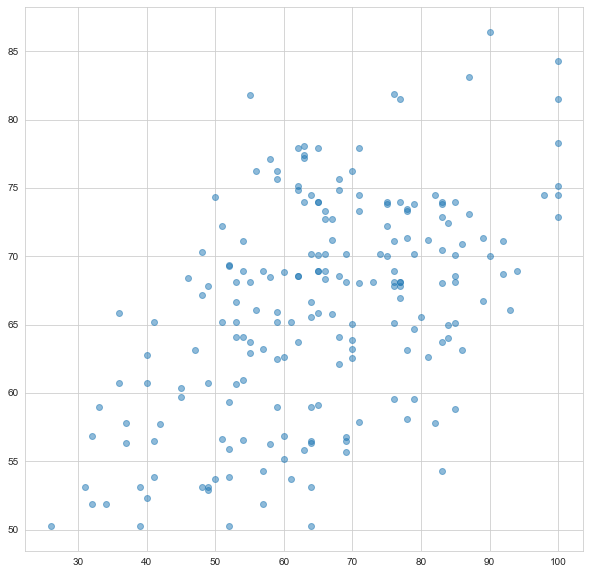

In [154]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_math_test,y_pred_test)
r2_test = r2_score(y_math_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_math_test, y_pred_test, alpha=0.5)


mse: 218.5505224609375 	 r2: 0.1394421410654434


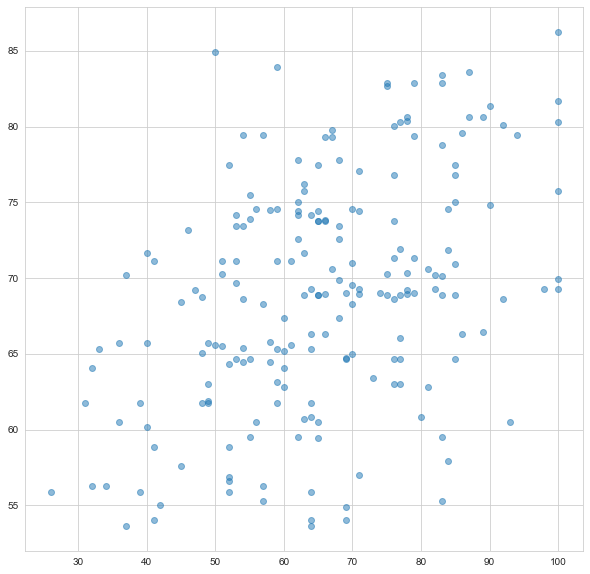

In [155]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_math_test,y_pred_test)
r2_test = r2_score(y_math_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_math_test, y_pred_test, alpha=0.5)

### Test dla reading_score

mse: 237.38369156439074 	 r2: -0.00771456185767927


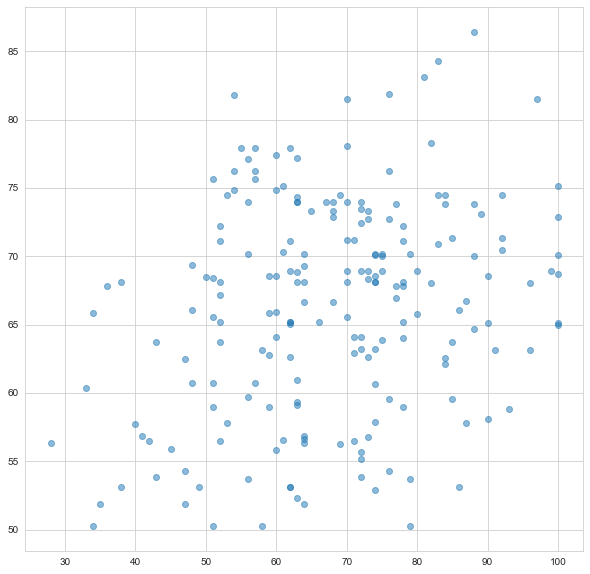

In [156]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_reading_test,y_pred_test)
r2_test = r2_score(y_reading_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_reading_test, y_pred_test, alpha=0.5)


mse: 174.2883349609375 	 r2: 0.2601307531085183


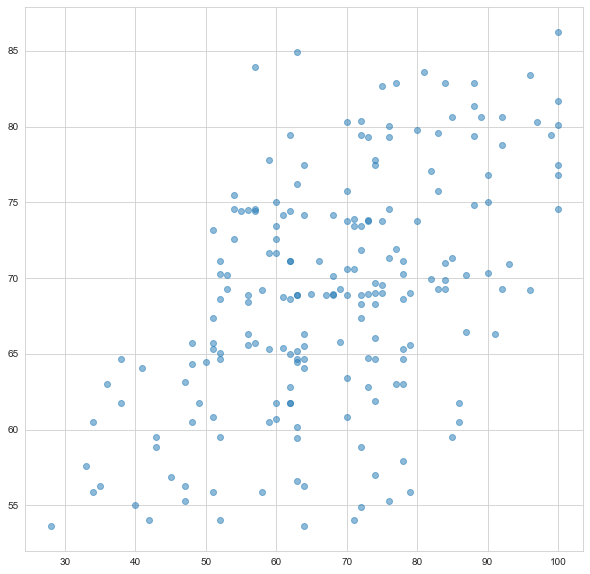

In [157]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_reading_test,y_pred_test)
r2_test = r2_score(y_reading_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_reading_test, y_pred_test, alpha=0.5)

### Test dla writing_score

mse: 251.5219979079403 	 r2: 0.05698676857089846


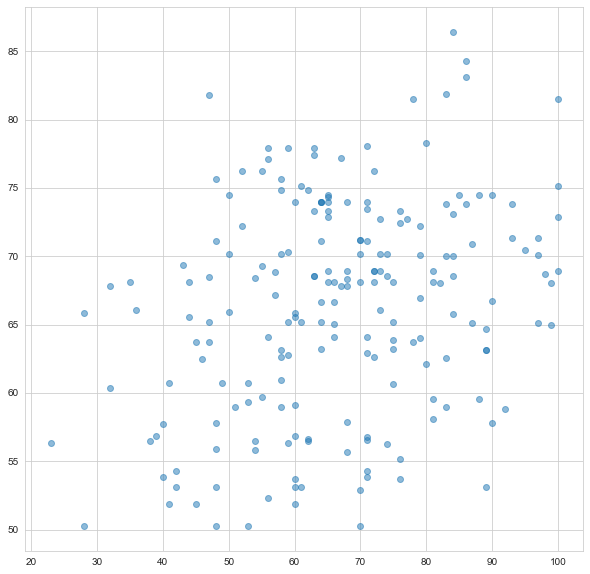

In [158]:
y_pred_test = svm_model.predict(X_test)
mse_test = mean_squared_error(y_writing_test,y_pred_test)
r2_test = r2_score(y_writing_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_writing_test, y_pred_test, alpha=0.5)


mse: 182.7936474609375 	 r2: 0.31466500103127204


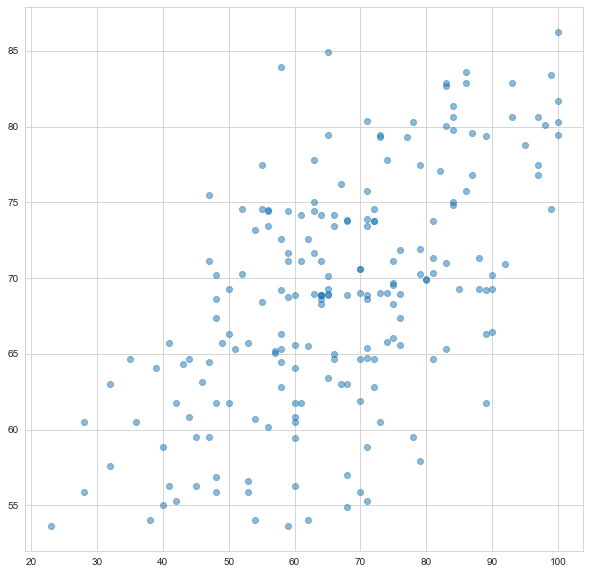

In [159]:
y_pred_test = linear_model.predict(X_test)
mse_test = mean_squared_error(y_writing_test,y_pred_test)
r2_test = r2_score(y_writing_test,y_pred_test)

print('mse:', mse_test, '\t', 'r2:', r2_test)
plt.figure(figsize = (10,10))
plt.scatter(y_writing_test, y_pred_test, alpha=0.5)

**Wniosek**: dla testu z matematyki lepszy jest SVM, dla testu z czytania i pisania lepszy jest model regresji liniowej.